In [2]:
!curl -O https://datasets.imdbws.com/title.basics.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  142M    1 2635k    0     0  1678k      0  0:01:26  0:00:01  0:01:25 1678k
  3  142M    3 5697k    0     0  2216k      0  0:01:05  0:00:02  0:01:03 2216k
  5  142M    5 8720k    0     0  2444k      0  0:00:59  0:00:03  0:00:56 2444k
  7  142M    7 10.9M    0     0  2460k      0  0:00:59  0:00:04  0:00:55 2460k
  9  142M    9 13.2M    0     0  2435k      0  0:00:59  0:00:05  0:00:54 2793k
 11  142M   11 16.1M    0     0  2526k      0  0:00:57  0:00:06  0:00:51 2791k
 13  142M   13 19.2M    0     0  2596k      0  0:00:56  0:00:07  0:00:49 2791k
 15  142M   15 22.1M    0     0  2646k      0  0:00:55  0:00:08  0:00:47 2790k
 17  142M   17 25.1M    0     0  2686k      0  0:00

In [3]:
!curl -O https://datasets.imdbws.com/title.crew.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 55.3M    0  492k    0     0  1276k      0  0:00:44 --:--:--  0:00:44 1276k
  5 55.3M    5 3376k    0     0  2336k      0  0:00:24  0:00:01  0:00:23 2336k
 11 55.3M   11 6429k    0     0  2705k      0  0:00:20  0:00:02  0:00:18 2705k
 16 55.3M   16 9448k    0     0  2797k      0  0:00:20  0:00:03  0:00:17 2797k
 21 55.3M   21 12.1M    0     0  2831k      0  0:00:20  0:00:04  0:00:16 2831k
 27 55.3M   27 15.1M    0     0  2893k      0  0:00:19  0:00:05  0:00:14 3018k
 31 55.3M   31 17.6M    0     0  2828k      0  0:00:20  0:00:06  0:00:14 2972k
 37 55.3M   37 20.6M    0     0  2860k      0  0:00:19  0:00:07  0:00:12 2935k
 42 55.3M   42 23.7M    0     0  2909k      0  0:00:19  0:00:08  0:00:11 2984k
 48 55.3M   48 26.7M    0     0  2919k      0  0:00

In [5]:
!curl -O https://datasets.imdbws.com/title.ratings.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  9 5813k    9  527k    0     0   571k      0  0:00:10 --:--:--  0:00:10  571k
 43 5813k   43 2553k    0     0  1758k      0  0:00:03  0:00:01  0:00:02 1757k
 96 5813k   96 5628k    0     0  2287k      0  0:00:02  0:00:02 --:--:-- 2287k
100 5813k  100 5813k    0     0  2296k      0  0:00:02  0:00:02 --:--:-- 2295k


In [1]:
import pandas as pd

In [2]:
basics = pd.read_csv("title.basics.tsv.gz" ,compression='gzip', sep='\t', dtype={"genres": str}, na_values = '\\N' )

C:\Users\Usrer\Anaconda3\envs\tf_gpu_2\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crew = pd.read_csv("title.crew.tsv.gz",compression='gzip', sep='\t', dtype={"directors": str,"writers": str}, na_values = '\\N')

In [4]:
ratings = pd.read_csv("title.ratings.tsv.gz",compression='gzip', sep='\t', na_values = '\\N')

In [5]:
df = basics.join(crew.set_index("tconst"), on="tconst", how="inner")
df = df.join(ratings.set_index("tconst"), on="tconst", how="inner")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193466 entries, 0 to 8514999
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1193466 non-null  object 
 1   titleType       1193466 non-null  object 
 2   primaryTitle    1193466 non-null  object 
 3   originalTitle   1193466 non-null  object 
 4   isAdult         1193466 non-null  float64
 5   startYear       1193264 non-null  float64
 6   endYear         35350 non-null    float64
 7   runtimeMinutes  862288 non-null   object 
 8   genres          1173527 non-null  object 
 9   directors       1008491 non-null  object 
 10  writers         926480 non-null   object 
 11  averageRating   1193466 non-null  float64
 12  numVotes        1193466 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 127.5+ MB


In [7]:
#df['genres'] = df['genres'].fillna('None')
#df['directors'] = df['directors'].fillna('None')
#df['writers'] = df['writers'].fillna('None')
df = df.dropna(subset=['primaryTitle', 'startYear', 'genres','directors','writers'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856006 entries, 8 to 8514959
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          856006 non-null  object 
 1   titleType       856006 non-null  object 
 2   primaryTitle    856006 non-null  object 
 3   originalTitle   856006 non-null  object 
 4   isAdult         856006 non-null  float64
 5   startYear       856006 non-null  float64
 6   endYear         26992 non-null   float64
 7   runtimeMinutes  670587 non-null  object 
 8   genres          856006 non-null  object 
 9   directors       856006 non-null  object 
 10  writers         856006 non-null  object 
 11  averageRating   856006 non-null  float64
 12  numVotes        856006 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 91.4+ MB


In [9]:
 df = df[df['numVotes'] >= 100]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259126 entries, 8 to 8514812
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          259126 non-null  object 
 1   titleType       259126 non-null  object 
 2   primaryTitle    259126 non-null  object 
 3   originalTitle   259126 non-null  object 
 4   isAdult         259126 non-null  float64
 5   startYear       259126 non-null  float64
 6   endYear         13238 non-null   float64
 7   runtimeMinutes  242612 non-null  object 
 8   genres          259126 non-null  object 
 9   directors       259126 non-null  object 
 10  writers         259126 non-null  object 
 11  averageRating   259126 non-null  float64
 12  numVotes        259126 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 27.7+ MB


In [11]:
df = df[df['titleType'] != 'tvEpisode']
df = df[df['titleType'] != 'videoGame']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154086 entries, 8 to 8514812
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          154086 non-null  object 
 1   titleType       154086 non-null  object 
 2   primaryTitle    154086 non-null  object 
 3   originalTitle   154086 non-null  object 
 4   isAdult         154086 non-null  float64
 5   startYear       154086 non-null  float64
 6   endYear         13238 non-null   float64
 7   runtimeMinutes  146688 non-null  object 
 8   genres          154086 non-null  object 
 9   directors       154086 non-null  object 
 10  writers         154086 non-null  object 
 11  averageRating   154086 non-null  float64
 12  numVotes        154086 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 16.5+ MB


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154086 entries, 0 to 154085
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          154086 non-null  object 
 1   titleType       154086 non-null  object 
 2   primaryTitle    154086 non-null  object 
 3   originalTitle   154086 non-null  object 
 4   isAdult         154086 non-null  float64
 5   startYear       154086 non-null  float64
 6   endYear         13238 non-null   float64
 7   runtimeMinutes  146688 non-null  object 
 8   genres          154086 non-null  object 
 9   directors       154086 non-null  object 
 10  writers         154086 non-null  object 
 11  averageRating   154086 non-null  float64
 12  numVotes        154086 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 15.3+ MB


In [15]:
from sklearn import preprocessing

column_names_to_normalize = ['startYear']
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[column_names_to_normalize].values)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[['startYear_norm']] = df_temp

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154086 entries, 0 to 154085
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          154086 non-null  object 
 1   titleType       154086 non-null  object 
 2   primaryTitle    154086 non-null  object 
 3   originalTitle   154086 non-null  object 
 4   isAdult         154086 non-null  float64
 5   startYear       154086 non-null  float64
 6   endYear         13238 non-null   float64
 7   runtimeMinutes  146688 non-null  object 
 8   genres          154086 non-null  object 
 9   directors       154086 non-null  object 
 10  writers         154086 non-null  object 
 11  averageRating   154086 non-null  float64
 12  numVotes        154086 non-null  int64  
 13  startYear_norm  154086 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 16.5+ MB


In [47]:
import pickle

with open('imdb_test_df_data.pickle', 'wb') as f:
    pickle.dump([df], f)

In [1]:
import pandas as pd
import pickle

with open('imdb_test_df_data.pickle', 'rb') as f:
    [df] = pickle.load(f)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154086 entries, 0 to 154085
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          154086 non-null  object 
 1   titleType       154086 non-null  object 
 2   primaryTitle    154086 non-null  object 
 3   originalTitle   154086 non-null  object 
 4   isAdult         154086 non-null  float64
 5   startYear       154086 non-null  float64
 6   endYear         13238 non-null   float64
 7   runtimeMinutes  146688 non-null  object 
 8   genres          154086 non-null  object 
 9   directors       154086 non-null  object 
 10  writers         154086 non-null  object 
 11  averageRating   154086 non-null  float64
 12  numVotes        154086 non-null  int64  
 13  startYear_norm  154086 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 16.5+ MB


In [3]:
primaryTitle_col = df['primaryTitle']
genres_col = df['genres']
directors_col = df['directors']
writers_col = df['writers']

In [4]:
import tensorflow as tf

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [6]:
tf.device("gpu:0")

In [7]:
max_primaryTitle_length = 40
max_genres_length = 3
max_directors_length = 50
max_writers_length = 80

In [8]:
import string
import re

def custom_normalize(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(string.punctuation), "")

def custom_standardization(input_data):
    return tf.strings.regex_replace(input_data, "[%s]" % re.escape(string.punctuation), " ")

In [9]:
import tensorflow_addons as tfa

In [10]:
def make_model():
	# creating book embedding path
	primaryTitle_input = tf.keras.Input(shape=[1], name="primaryTitle-Input", dtype=tf.string)

	# Create the layer.
	primaryTitle_vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
	 standardize=custom_normalize,
	 output_mode='int',
	 output_sequence_length=max_primaryTitle_length)

	primaryTitle_vectorize_layer.adapt(primaryTitle_col.to_numpy())

	n_primaryTitle = len(primaryTitle_vectorize_layer.get_vocabulary())

	primaryTitle_embedding = tf.keras.layers.Embedding(n_primaryTitle, 20, name="primaryTitle-Embedding")(
		primaryTitle_vectorize_layer(primaryTitle_input)
	)
	primaryTitle_vec = tf.keras.layers.Flatten(name="Flatten-primaryTitle")(primaryTitle_embedding)



	# creating book embedding path
	genres_input = tf.keras.Input(shape=[1], name="genres-Input", dtype=tf.string)

	# Create the layer.
	genres_vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
	 standardize=custom_standardization,
	 output_mode='int',
	 output_sequence_length=max_genres_length)

	genres_vectorize_layer.adapt(genres_col.to_numpy())

	n_genres = len(genres_vectorize_layer.get_vocabulary())

	genres_embedding = tf.keras.layers.Embedding(n_genres, 4, name="genres-Embedding")(genres_vectorize_layer(genres_input))
	genres_vec = tf.keras.layers.Flatten(name="Flatten-genres")(genres_embedding)


	# creating book embedding path
	directors_input = tf.keras.Input(shape=[1], name="directors-Input", dtype=tf.string)

	# Create the layer.
	directors_vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
	 standardize=custom_standardization,
	 output_mode='int',
	 output_sequence_length=max_directors_length)

	directors_vectorize_layer.adapt(directors_col.to_numpy())

	n_directors = len(directors_vectorize_layer.get_vocabulary())

	directors_embedding = tf.keras.layers.Embedding(n_directors, 24, name="directors-Embedding")(directors_vectorize_layer(directors_input))
	directors_vec = tf.keras.layers.Flatten(name="Flatten-directors")(directors_embedding)


	# creating writers embedding path
	writers_input = tf.keras.Input(shape=[1], name="writers-Input", dtype=tf.string)

	# Create the layer.
	writers_vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
	 standardize=custom_standardization,
	 output_mode='int',
	 output_sequence_length=max_writers_length)

	writers_vectorize_layer.adapt(writers_col.to_numpy())

	n_writers = len(writers_vectorize_layer.get_vocabulary())

	writers_embedding = tf.keras.layers.Embedding(n_writers, 24, name="writers-Embedding")(writers_vectorize_layer(writers_input))
	writers_vec = tf.keras.layers.Flatten(name="Flatten-writers")(writers_embedding)

    
	# creating writers embedding path
	startYear_input = tf.keras.Input(shape=[1], name="startYear-Input", dtype=tf.float32)
    

	# concatenate features
	conc = tf.keras.layers.Concatenate()([primaryTitle_vec, genres_vec, directors_vec, writers_vec, startYear_input])
	# add fully-connected-layers
	fc1 = tf.keras.layers.Dense(256, activation='tanh', name = 'properties')(tf.keras.layers.Dropout(0.2)(conc))
	#fc2 = tf.keras.layers.Dense(256, activation='relu')(fc1)
	fc3 = tf.keras.layers.Dense(64, activation='relu', name = 'features')(tf.keras.layers.Dropout(0.2)(fc1))
	#out = tf.keras.layers.Dense(1, activation="linear", name='output')(fc3)
	out = tfa.layers.maxout.Maxout(num_units=1, name="maxout_1")(tf.keras.layers.Dropout(0.2)(fc3))
	# Create model and compile it
	model2 = tf.keras.Model([primaryTitle_input, genres_input, writers_input, directors_input, startYear_input], out)
	model2.compile('adam', 'mean_squared_error')
    
	return model2

In [11]:
model = make_model()

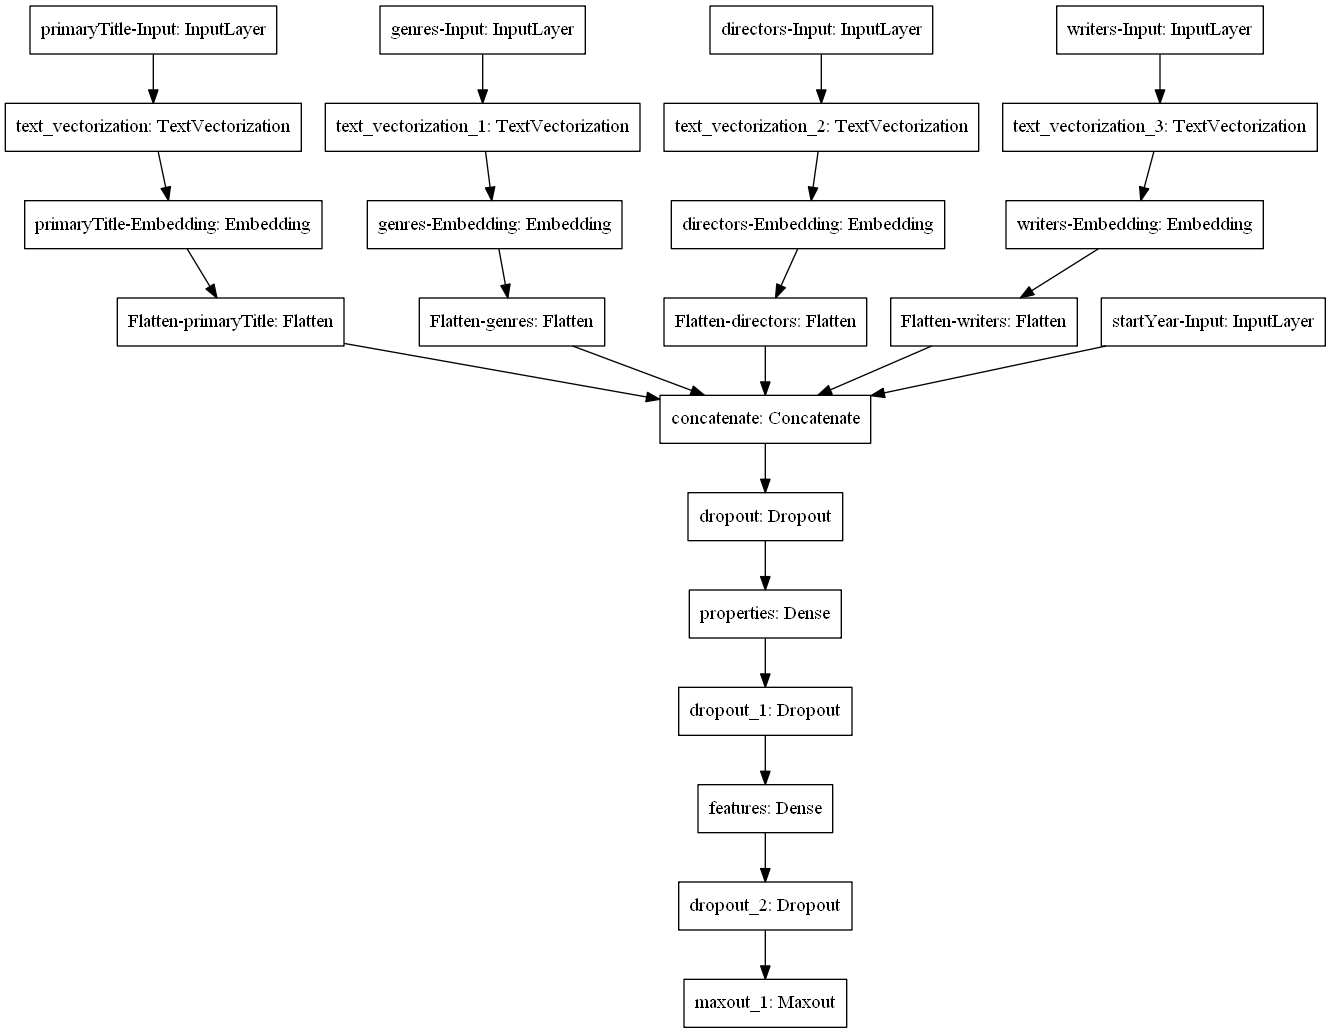

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
primaryTitle-Input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
genres-Input (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
directors-Input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
writers-Input (InputLayer)      [(None, 1)]          0                                            
_______________________________________________________________________________________

In [14]:
history = model.fit([df.primaryTitle, df.genres, df.directors, df.writers, df.startYear_norm], df.averageRating, epochs=10, verbose=1)

Epoch 1/10
4816/4816 [==============================] - 264s 55ms/step - loss: 1.4066
Epoch 2/10
4816/4816 [==============================] - 266s 55ms/step - loss: 0.9724
Epoch 3/10
4816/4816 [==============================] - 265s 55ms/step - loss: 0.7553
Epoch 4/10
4816/4816 [==============================] - 267s 55ms/step - loss: 0.6310
Epoch 5/10
4816/4816 [==============================] - 263s 55ms/step - loss: 0.5485
Epoch 6/10
4816/4816 [==============================] - 264s 55ms/step - loss: 0.4957
Epoch 7/10
4816/4816 [==============================] - 270s 56ms/step - loss: 0.4531
Epoch 8/10
4816/4816 [==============================] - 264s 55ms/step - loss: 0.4220
Epoch 9/10
4816/4816 [==============================] - 263s 55ms/step - loss: 0.3989
Epoch 10/10
4816/4816 [==============================] - 262s 54ms/step - loss: 0.3781


In [15]:
#model2.save('imdb_model')

In [15]:
model.save_weights('imdb_model_weights_small/imdb_model_weights')

In [82]:
history = model.fit([df.primaryTitle, df.genres, df.directors, df.writers, df.startYear_norm], df.averageRating, epochs=10, verbose=1)

Epoch 1/10
4816/4816 [==============================] - 280s 58ms/step - loss: 0.3625
Epoch 2/10
4816/4816 [==============================] - 275s 57ms/step - loss: 0.3452
Epoch 3/10
4816/4816 [==============================] - 276s 57ms/step - loss: 0.3315
Epoch 4/10
4816/4816 [==============================] - 279s 58ms/step - loss: 0.3194
Epoch 5/10
4816/4816 [==============================] - 278s 58ms/step - loss: 0.3078
Epoch 6/10
4816/4816 [==============================] - 263s 55ms/step - loss: 0.2969
Epoch 7/10
4816/4816 [==============================] - 273s 57ms/step - loss: 0.2902
Epoch 8/10
4816/4816 [==============================] - 266s 55ms/step - loss: 0.2792
Epoch 9/10
4816/4816 [==============================] - 271s 56ms/step - loss: 0.2727
Epoch 10/10
4816/4816 [==============================] - 272s 56ms/step - loss: 0.2656


In [83]:
model.save_weights('imdb_model_weights_small_2/imdb_model_weights')

In [14]:
#model.load_weights('imdb_model_weights_small_2/imdb_model_weights')

In [84]:
model_concatenate = tf.keras.Model(inputs = model.input, outputs = model.get_layer('concatenate').output)

In [85]:
predictions = []
for index in range(len(df)):
    row = df.iloc[[index]]
    y_row = model_concatenate.predict_on_batch([row.primaryTitle, row.genres, row.directors, row.writers, row.startYear_norm])
    predictions.append(y_row)

In [86]:
import numpy as np
predictions = np.concatenate(predictions)


In [33]:
import pickle

with open('imdb_test_concatenate_predictions.pickle', 'wb') as f:
    pickle.dump([predictions], f)

In [87]:
from sklearn import preprocessing
predictions = preprocessing.normalize(predictions)

In [88]:
from sklearn.decomposition import PCA

In [89]:
n_components = 200
whiten = False
random_state = 2018

In [90]:
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [91]:
X_train_PCA = pca.fit_transform(predictions)

In [92]:
print("Variance Explained by principal components: ", sum(pca.explained_variance_ratio_))

Variance Explained by principal components:  0.9410778239028812


In [93]:
from sklearn.neighbors import KDTree

In [94]:
kdtree = KDTree(X_train_PCA)

In [95]:
import pickle

with open('imdb_test_object_data.pickle', 'wb') as f:
    pickle.dump([df, X_train_PCA, kdtree], f)

In [96]:
def findNearest(tconst):
    idx = df[df["tconst"] == tconst].index[0]
    _, ind = kdtree.query(X_train_PCA[idx:idx+1], k=51)
    return df.iloc[ind[0][0:]]

In [97]:
findNearest("tt0120338")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,startYear_norm
44984,tt0120338,movie,Titanic,Titanic,0.0,1997.0,NaN,194,"Drama,Romance",nm0000116,nm0000116,7.8,1107195,0.811024
30268,tt0088247,movie,The Terminator,The Terminator,0.0,1984.0,NaN,107,"Action,Sci-Fi",nm0000116,"nm0000116,nm0005036,nm0936537",8.0,825868,0.708661
70269,tt0379354,short,Lilly,Lilly,0.0,2001.0,NaN,40,"Drama,Short",nm1441566,"nm1441566,nm0406926",7.7,226,0.842520
116236,tt2322822,tvMovie,The Elisted,The Elisted,0.0,2012.0,NaN,NaN,Comedy,nm1938104,nm1938104,8.5,144,0.929134
34239,tt0096754,movie,The Abyss,The Abyss,0.0,1989.0,NaN,140,"Adventure,Drama,Mystery",nm0000116,nm0000116,7.5,171937,0.748031
59200,tt0251488,short,Xenogenesis,Xenogenesis,0.0,1978.0,NaN,12,"Sci-Fi,Short","nm0000116,nm0289696","nm0000116,nm0289696",5.4,1137,0.661417
37149,tt0103064,movie,Terminator 2: Judgment Day,Terminator 2: Judgment Day,0.0,1991.0,NaN,137,"Action,Sci-Fi",nm0000116,"nm0000116,nm0936537",8.5,1043539,0.763780
116467,tt2338151,movie,PK,PK,0.0,2014.0,NaN,153,"Comedy,Drama,Sci-Fi",nm0386246,"nm0386246,nm0430785",8.1,174233,0.944882
104711,tt1592812,tvSeries,Shararat,Shararat,0.0,2003.0,2006.0,30,"Comedy,Fantasy,Romance",nm0576491,nm0576491,7.5,1504,0.858268
98792,tt13491806,tvSeries,Esperança,Esperança,0.0,2020.0,NaN,NaN,Comedy,nm1659256,"nm1659256,nm1761005,nm2143612",8.6,172,0.992126


In [98]:
findNearest("tt0113568")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,startYear_norm
41780,tt0113568,movie,Ghost in the Shell,Kôkaku Kidôtai,0.0,1995.0,NaN,83,"Action,Animation,Crime",nm0651900,"nm0794385,nm0411872",8.0,137202,0.795276
95608,tt1260502,movie,Ghost in the Shell 2.0,Kôkaku kidôtai 2.0,0.0,2008.0,NaN,83,"Action,Adventure,Animation",nm0651900,"nm0794385,nm0411872",8.0,14256,0.897638
67736,tt0347246,movie,Ghost in the Shell 2: Innocence,Inosensu: Innocence,0.0,2004.0,NaN,100,"Animation,Drama,Mystery",nm0651900,"nm0794385,nm0651900,nm0258268,nm0556856",7.5,37590,0.866142
139613,tt5973984,tvMovie,Ghost in the Shell Arise: Border 5 - Pyrophori...,Ghost in the Shell Arise: Border 5 - Pyrophori...,0.0,2015.0,NaN,46,"Action,Animation,Sci-Fi",nm0457124,"nm0794385,nm2396196",7.3,651,0.952756
130778,tt4337072,movie,Ghost in the Shell: The New Movie,Kôkaku Kidôtai Shin Gekijôban,0.0,2015.0,NaN,100,"Action,Animation,Sci-Fi","nm0457124,nm2420940","nm0794385,nm0121423,nm1727020,nm2396196",6.7,3737,0.952756
126070,tt3579524,movie,Ghost in the Shell Arise: Border 3 - Ghost Tears,Ghost in the Shell Arise: Border 3 - Ghost Tears,0.0,2014.0,NaN,55,"Action,Animation,Sci-Fi",nm0457124,"nm0794385,nm2396196,nm0926075",7.2,2642,0.944882
128926,tt4016942,movie,Ghost in the Shell Arise: Border 4 - Ghost Sta...,Ghost in the Shell Arise: Border 4 - Ghost Sta...,0.0,2014.0,NaN,59,"Action,Animation,Sci-Fi","nm1556115,nm0457124","nm0794385,nm2396196",7.2,2070,0.944882
119506,tt2636124,movie,Ghost in the Shell: Arise - Border 1: Ghost Pain,Ghost in the Shell Arise: Border 1 - Ghost Pain,0.0,2013.0,NaN,58,"Action,Animation,Sci-Fi","nm1496044,nm0457124","nm0794385,nm2396196,nm0121423,nm1727020",7.1,3991,0.937008
121958,tt3017864,movie,Ghost in the Shell Arise: Border 2 - Ghost Whi...,Ghost in the Shell Arise: Border 2 - Ghost Whi...,0.0,2013.0,NaN,57,"Action,Animation,Sci-Fi","nm0847591,nm0457124","nm0794385,nm2396196",7.2,2917,0.937008
82649,tt0856797,tvMovie,Ghost in the Shell: Stand Alone Complex - Soli...,Kôkaku kidôtai: Stand Alone Complex Solid Stat...,0.0,2006.0,NaN,108,"Action,Adventure,Animation",nm0436784,"nm0794385,nm0436784,nm1591046,nm1371924",8.0,6953,0.881890


In [111]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import *

idx = df[df["tconst"] == "tt0113568"].index[0]
_, ind = kdtree.query(X_train_PCA[idx:idx+1], k=100)
nearest3d =  X_train_PCA[ind[0]]

tsne = TSNE(n_components=3).fit_transform(nearest3d)

texts = df.iloc[ind[0]]["primaryTitle"]

li = []
for x in range(100):
    li.append(x)

scatter = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    text=texts,
    marker=dict(
        size=8,
        color=li,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ))

fig = go.Figure(data=[scatter])

plot(fig, filename='simple-3d-scatter-x.html')

'simple-3d-scatter-x.html'

In [112]:
tsne2 = TSNE(n_components=2).fit_transform(nearest3d)


scatter2 = go.Scatter(
    x=tsne[:,0],
    y=tsne[:,1],
    mode='markers',
    text=texts,
    marker=dict(
        size=8,
        color=li,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ))

fig2 = go.Figure(data=[scatter2])

plot(fig2, filename='simple-2d-scatter-x.html')

'simple-2d-scatter-x.html'